### Students Turn Activity 1 Instructions

In this activity, we are going to review Tweepy.

* Loop through 5 pages of tweets (100 tweets total)

* Print out each tweet with a number keeping track the number of tweets.  For example, the most recent tweet should read "Tweet 1: <Text of the most recent tweet>".

### Hints

* Use a nested for loop and a counter at the end of your loop to increment.

* Refer to the [Tweepy Documentation](http://docs.tweepy.org/en/v3.5.0/api.html#timeline-methods).

- - -

In [4]:
# Dependencies
import tweepy
import json
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target User Account
user = "wilw"

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):

    # Get all tweets from home feed (for each page specified)
    public_tweets = api.user_timeline(user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        text = tweet["text"]

        # Print Tweet
        print(f"Tweet {counter}: {text}")
        counter += 1

TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]

# Instructor Turn Activity 2 
#### Introducing Valence Aware Dictionary and sentiment Reasoner (VADER).
#### Resource https://github.com/cjhutto/vaderSentiment

In [8]:
!pip install vaderSentiment==2.5

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
# Sample Strings
happy_string = "Your humble instructor is smart, beautiful, and funny!"
# angry_string = ("Ugh. I am feeling so distraught! "
#                 "I hate everything. "
#                 "I am mad at everyone.")
# happy_emoticon_string = ":-) :) :-D  ;-) :-P"
# angry_emoticon_string = ":-( :( D-< :'("
# funny_slang_string = "lol rofl haha"
# angry_slang_string = "Sux meh grr"

# Target String Setting
target_string = happy_string

In [11]:
# Run analysis
results = analyzer.polarity_scores(target_string)
results

{'compound': 0.8687, 'neg': 0.0, 'neu': 0.338, 'pos': 0.662}

In [12]:
# Run analysis
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]

In [13]:
# Print Analysis
print(target_string)
print("Compound Score:", compound)
print("Positive Score:", pos)
print("Neutral Score:", neu)
print("Negative Score: ", neg)

Your humble instructor is smart, beautiful, and funny!
Compound Score: 0.8687
Positive Score: 0.662
Neutral Score: 0.338
Negative Score:  0.0


## Students Turn Activity 3
## Sentiment, I am your analysis

Your turn to run a VADER analysis.

### Instructions

* Open and read the three sample texts.

* For each sample, print out the sample text and the "compound", "positive", "neutral" and "negative" score for each.

### Hints

* Start with reading files and printing them. Once you have this, treat the files as if they were in your script the entire time. (What would be good to do this?)

- - -

In [14]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [30]:
# Placeholder for strings


# Open each of the samples
sample1 = open("Resources/Sample1.txt").read()
sample2 = open("Resources/Sample2.txt").read()
sample3 = open("Resources/Sample3.txt").read()

In [36]:
# Run Vader Sentiment Analysis on Each of the Samples
samples = [sample1, sample2, sample3]
# Loop through Each Sample
for sample in samples:
    results1 = analyzer.polarity_scores(sample)
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    
    print(sample)
    print("Compound Score:", compound)
    print("Positive Score:", pos)
    print("Neutral Score:", neu)
    print("Negative Score:", neg)

"""
OR!!!

results1 = analyzer.polarity_scores(sample1)
results2 = analyzer.polarity_scores(sample2)
results3 = analyzer.polarity_scores(sample3)

# Print Samples and Analysis
print(f"{sample1} {results1}")
print(f"{sample2} {results2}")
print(f"{sample3} {results3}")
"""

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections. The bedding was hardly able to cover it and seemed ready to slide off any moment. His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.
Compound Score: -0.7096
Positive Score: 0.056
Neutral Score: 0.825
Negative Score: 0.119
When we recognise the virtues, the talent, the beauty of Mother Earth, something is born in us, some kind of connection, love is born.
Compound Score: -0.7096
Positive Score: 0.056
Neutral Score: 0.825
Negative Score: 0.119
And you're worried, not because you're headed to meet a houseful of vampires, but because you think those vampires won't approve of you, correct?
That's right, I answered immediately, hiding my surprise at his casual u

'\nOR!!!\n\nresults1 = analyzer.polarity_scores(sample1)\nresults2 = analyzer.polarity_scores(sample2)\nresults3 = analyzer.polarity_scores(sample3)\n\n# Print Samples and Analysis\nprint(f"{sample1} {results1}")\nprint(f"{sample2} {results2}")\nprint(f"{sample3} {results3}")\n'

## Students Turn Activity 4 Twitter Analysis

In this activity, you will inspect the sentiment of a famous individual's tweets.

### Instructions

* Using the tweepy package, analyze the tweets from "@DalaiLama".

  * Analyze a total of 200 tweets. (How many tweets are on a page?)

  * Store the different scores (positive, negative, neutral, compound) in different lists.

  * Print the user's name and the mean of the following scores:

    * Compound

    * Positive

    * Neutral

    * Negative

### Bonus

* Compare the analysis to two other twitter accounts.  Display the results in a Pandas DataFrame.

* Feel free to use accounts of your own but remember you need to have at least 200 tweets.

* If you don't have an account or enough tweets, try using "@RealDonaldtrump" and "@Katyperry"

- - -


In [37]:
# Dependencies
import tweepy
import numpy as np

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [54]:
# Target User Account
user = "wilw"
compound = []
pos = []
neu = []
neg = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 11):

    # Get all tweets from home feed (for each page specified)
    public_tweets = api.user_timeline(user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        
        # Add each value to the appropriate list
        compound.append(results["compound"])
        pos.append(results["pos"])
        neu.append(results["neu"])
        neg.append(results["neg"])

In [55]:
# Print the Averages
print(len(neg))
print(f"Mean positive: {np.mean(pos)}")
print(f"Mean negative: {np.mean(neg)}")
print(f"Mean neutral: {np.mean(neu)}")
print(f"Mean compound: {np.mean(compound)}")

199
Mean positive: 0.12258291457286433
Mean negative: 0.07967336683417088
Mean neutral: 0.7977236180904523
Mean compound: 0.08237336683417085


# Instructor Turn Activity 5

In [59]:
# Dependencies
import tweepy
import numpy as np

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [60]:
# Search for People Tweeting about Mark Hamill
search_term = "Mark Hamill"

# Retrieve 100 tweets
public_tweets = api.search(search_term, count=100)

# Print Tweets
for tweet in public_tweets["statuses"]:

    # Print the username
    print(tweet["user"]["screen_name"])

    # Print the tweet text
    print(tweet["text"])
    print()

phoenixphire24
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not Mark Hamill, or Adam Driver, o…

SecretGamerGrrl
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not Mark Hamill, or Adam Driver, o…

HamillSkywalkr
@kfab_production @BasslineVO @starwars @HamillHimself Hi Konner. WOW The force has been strong with you this past w… https://t.co/AWTtMNQoWh

tacticalalive
@ArdentPrayer He's no Heath Ledger, but that's a bar only Marky mark Hamill can reach. So don't be so hard on the boy would you.

MVP28_
Mark Hamill says hello. 

Unless you’re talking strictly in terms of film. https://t.co/jDkDdeSqMZ

grimmtooth
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not Mark Hamill, or Adam Driver, o…

TheAlexNevil
RT @ADDiane: Why doesn't Mark Hamill take hot showers? 

He prefers them Luke warm.

TylerJavier
RT @gingerBFG:

In [61]:
# Print total number of tweets retrieved
print(len(public_tweets["statuses"]))

100


In [62]:
# With Filter
# Dependencies
import tweepy

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [63]:
# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

In [67]:
# Search for People Tweeting about Mark Hamill
search_term = "Mark Hamill"

# Create variable for holding the oldest tweet
oldest_tweet = None

# List to hold unique IDs
unique_ids = []

# Counter to keep track of the number of tweets retrieved
counter = 0

# Loop through 5 times (total of 500 tweets)
for x in range(5):

    # Retrieve 100 most recent tweets -- specifying a max_id
    public_tweets = api.search(search_term, 
                               count=100, 
                               result_type="recent", 
                               max_id=oldest_tweet)

    # Print Tweets
    for tweet in public_tweets["statuses"]:
        
        tweet_id = tweet["id"]
        
        # Use filters to check if user meets conditions
        if (tweet["user"]["followers_count"] < max_followers and
            tweet["user"]["statuses_count"] > min_tweets and
            tweet["user"]["statuses_count"] < max_tweets and
            tweet["user"]["friends_count"] < max_following and
                tweet["user"]["lang"] == lang):

            # Print the username
            print(tweet["user"]["screen_name"])

            # Print the tweet id
            print(tweet["id_str"])

            # Print the tweet text
            print(tweet["text"])
            print()

            # Append tweet_id to ids list if it doesn't already exist
            # This allows checking for duplicate tweets
            if tweet_id not in unique_ids:
                unique_ids.append(tweet_id)

            # Increase counter by 1
            counter += 1

        # Reassign the the oldest tweet (i.e. the max_id)
        # Subtract 1 so the previous oldest isn't included
        # in the new search
        oldest_tweet = tweet_id - 1

incendiaryxwit
1004191814692327429
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not Mark Hamill, or Adam Driver, o…

_essayer
1004191509837574146
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not Mark Hamill, or Adam Driver, o…

dani_sella
1004191403562422273
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not Mark Hamill, or Adam Driver, o…

HamillSkywalkr
1004190740472188928
@kfab_production @BasslineVO @starwars @HamillHimself Hi Konner. WOW The force has been strong with you this past w… https://t.co/AWTtMNQoWh

tacticalalive
1004190738874155009
@ArdentPrayer He's no Heath Ledger, but that's a bar only Marky mark Hamill can reach. So don't be so hard on the boy would you.

elka_1996
1004186799319601152
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not

MysteryVFXSuper
1004151592042487808
Can it star Mark Hamill as the Joker? https://t.co/G9hKsnqvW9

jspencer91
1004151304204283905
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not Mark Hamill, or Adam Driver, o…

DespicableFool
1004151228153188354
@localsaturn I agree with pretty much everything you said. I haven't seen the movie myself, but I've talked to peop… https://t.co/896JIAteo0

ImMrBigWhite
1004148909554487296
@INFINITE_SGE This is ridiculous man. Nobody out there flaming Mark Hamill for Luke being written like GARBAGE in t… https://t.co/J86rtMF5Me

slightlylit
1004148548571521025
RT @gingerBFG: Funny how it’s Kelly Marie Tran and Daisy Ridley who’ve been driven off social media, and not Mark Hamill, or Adam Driver, o…

sojournermike
1004148290110218241
RT @Okay_HearMeOut: @Karnythia Jokers Ranked:
1. Heath Ledger
2. Mark Hamill
3. Jack Nicholson 
4. Zach Galifinakis 
5. Kevin Michael Richa…

carriuncensored
1004147769

Vividgamer531
1004100721170632704
@yogibythefly @goldmanvision @DDayCobra Agreed it doesnt make it right to attack her. But at the same time shes in… https://t.co/Ygo4YT8qwG

Celticshade
1004099737404964864
@cosmictopp @supershayne @NoahGrossman214 @mattraub Its Hamilton but only starring Mark Hamill.

Yodalovestrills
1004098884199645184
RT @MichaelF141: This is basically what Katie has always said about Supercorp. So do Krams consider Mark Hamill a queerbaiter? https://t.co…

sculkmusic
1004095653922918402
@SWTweets Still a better actor than Mark Hamill.

SomeGuyDarkSide
1004094226169151490
RT @GeorgeTakei: Brilliant. https://t.co/Q6xt26ETCr

AlabamaNina
1004092246642307073
RT @GeorgeTakei: Brilliant. https://t.co/Q6xt26ETCr

Baenesh
1004092138844577793
RT @GeorgeTakei: Brilliant. https://t.co/Q6xt26ETCr

dj_ferdinand45
1004091936230162432
RT @GeorgeTakei: Brilliant. https://t.co/Q6xt26ETCr

G360LIVE
1004091479344574465
@suzannesamin If I can get Rose Tico outside of the terribly-writ

In [68]:
# Print total number of tweets retrieved
print(counter)

187


In [69]:
# Print the number of unique ids retrieved
print(len(unique_ids))


187


# Students Turn Activity 7 Frequent Twitter Miles

Airlines get a lot of flack on twitter, especially from big time Journalists who think they are the only ones affected by flying. Lets see what kind of tone everyone else takes when tweeting about them.

### Instructions

* Your goal is to retrieve 1000 tweets for each of the 7 popular airlines and run a VADER sentiment analysis on them.

* Create an empty list to hold to results from each airline,

* Filter the tweets using the given "Real Person" filter variables.

* Create a "sentiment" dictionary for each airline that includes the search term, and the averages of the compound, neutral, positive, and negative scores.  Print this dictionary and append it to a list holding each airline's results.

* Create a DataFrame to display the results.

### HINTS

* Start with a subset of data for each airline while testing. Then, adapt your code to collect all 1000 tweets per airline.

* For a reference on using max_id, see this link: [Working with Timelines](https://developer.twitter.com/en/docs/tweets/timelines/guides/working-with-timelines)

- - -


In [75]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [79]:
# Target Search Term
search = ["Jet Blue", "Southwest Air", "American Air", "Delta Airline", "SAS", "Alaska Air", "WOW Air"]

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# List to hold results
results = []

# Loop through all target users
for target in search:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound = []
    pos = []
    neu = []
    neg = [] 
    
    # Loop through 10 times
    for x in range(5):

        # Retrieve 100 most recent tweets -- specifying a max_id
        public_tweets = api.search(target, count=100, result_type="result", max_id=oldest_tweet)

        # Print Tweets
        for tweet in public_tweets["statuses"]:

            tweet_id = tweet["id"]

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                tweet["user"]["lang"] == lang): 

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])

                # Add each value to the appropriate list
                compound.append(results["compound"])
                pos.append(results["pos"])
                neu.append(results["neu"])
                neg.append(results["neg"])
                
                oldest_tweet = tweet["id"] - 1
            sentiment = {
                "User": target,
                "Compound": np.mean(compound),
                "Positive": np.mean(pos),
                "Negative": np.mean(neg),
                "Neutral": np.mean(neu),
            }

                
print(sentiment)

# Run search around each tweet


# Loop through all tweets
    
# Use filters to check if user meets conditions
            
# Run Vader Analysis on each tweet
     

# Add each value to the appropriate list
               
# Set the new oldest_tweet value
      

# Store the Average Sentiments
   

# Print the Sentiments

    
# Append airline results to 'results_list'


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [ ]:
# Create a DataFrame using results_list and display
airline_df = pd.DataFrame(results).set_index("User")

# Students Activity 8
# Now Plot it out

Sentiment Analysis is already crazy fun, but how can we visualize it? In this exercise we will do just that!

### Instructions

* Run a sentiment analysis on tweets from "@SouthwestAir".

* On top of you regular analysis, you should also keep track of how many tweets ago was it tweeted.

* Next store our results into a pandas DataFrame and read results.

* Finally create a plot with the follow labels.

  * Title as "Sentiment Analysis of Tweet (`date`) for `Twitter Handle`.

  * Y label as "Tweet Polarity"

  * X label as "Tweets Ago"

### Hints

* Make sure you are using the correct method from Tweepy to gather statuses from a specific user.

### Bonus

* Order the tweets from oldest to newest in the plot.

- - -

In [80]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [85]:
# Target Account
target = "@SouthwestAir"

# Counter
counter = 0

# Variables for holding sentiments
sentiment = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1,6):

    # Get all tweets from home feed
    public_tweets = api.search(target, max_id=oldest_tweet)

    # Print Tweets
    for tweet in public_tweets["statuses"]:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        tweet_id = tweet["id"]

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])

        # Add each value to the appropriate list
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet["id"] - 1
        tweets_ago = counter
        
        sentiment.append({
            "Date": tweet["created_at"],
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Tweets Ago": tweets_ago
        })
        counter += 1
    # Loop through all tweets 

    # Print Tweets
    # print("Tweet %s: %s" % (counter, tweet["text"]))

    # Run Vader Analysis on each tweet


    

    # Add sentiments for each tweet into a list

    # Add to counter 
print(sentiment)

Tweet 0: @SouthwestAir Thanks for confirming this an for the link. The employees at FLL don't understand the policy and only… https://t.co/8irPm2c8wg
Tweet 1: RT @SouthwestAir: Unlocking millions of low fares for fall.
Tweet 2: RT @SouthwestAir: Get low fares today with over 250 nonstop flights from the Los Angeles area.
Tweet 3: @YasmeenBhatti @SouthwestAir Banff !!
Tweet 4: @SouthwestAir I’ve spend about 10 hours on the phone with Southwest &amp; PayPal over the last 4 days. PayPal says that… https://t.co/UNkl3vLKr5
Tweet 5: @SouthwestAir Hi!  I'm a rapid rewards member and I'd like to update the name on my account.  Can you assist?
Tweet 6: @SouthwestAir thanks for a great flight back home to BHM and a lovely view of the Grand Canyon along the way! https://t.co/AD8iIPat1T
Tweet 7: @SouthwestAir I've done that and they are refusing. So again.....SOUTHWEST IS REFUSING TO REPLACE MY DAMAGED LUGGAG… https://t.co/dSGmPUdCAs
Tweet 8: RT @SouthwestAir: Unlocking millions of low fares for f

In [87]:
# Convert sentiments to DataFrame
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.4404,Wed Jun 06 04:03:20 +0000 2018,0.000,0.868,0.132,0
1,-0.2732,Wed Jun 06 04:03:16 +0000 2018,0.208,0.792,0.000,1
2,-0.2732,Wed Jun 06 04:03:12 +0000 2018,0.123,0.877,0.000,2
3,0.0000,Wed Jun 06 04:03:11 +0000 2018,0.000,1.000,0.000,3
4,0.0000,Wed Jun 06 04:02:29 +0000 2018,0.000,1.000,0.000,4


Text(0.5,1,'Sentiment Analysis (18-06-05 Jun-06 for @SouthwestAir)')

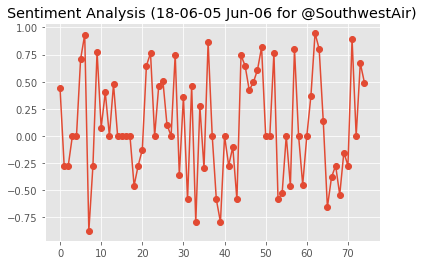

In [92]:
# Create plot
x_vals = sentiment_df["Tweets Ago"]
y_vals = sentiment_df["Compound"]
plt.plot(x_vals, y_vals, marker = "o")
# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%y-%m-%d %h-%m")
plt.title(f"Sentiment Analysis ({now} for {target})")

# Instructor Turn Activity 9 In Tweets Out

In [93]:
# Dependencies
import tweepy

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [94]:
# Create a status update
api.update_status("Hey! I'm tweeting programmatically!")

# Create a status update
api.update_with_media("./Resources/too-much-big-data.jpg",
                      "And now... I just tweeted an image programmatically!")

TweepError: [{'message': 'Application cannot perform write actions. Contact Twitter Platform Operations through https://support.twitter.com/forms/platform', 'code': 261}]

# Students Activity 10 Hello Twitter World

You've spent so much time analyzing and reading everyone elses tweet's that you now have alot on your mind. Well fear not! Now is your time to talk to the world.

### Instructions

* Update your twitter with two separate status updates.

* Update your twitter with a photo and a witty comment to go with it.

* Look up how to add friends by using "Friendship Methods". Programatically add someone in class as your friend, and have them add you as a friend.

* Once you are both twitter followers of each other you can then send direct messages to one another.  Give it a try!

* Use the [tweepy docs](http://tweepy.readthedocs.io/en/v3.5.0/api.html) for reference

### Bonus

* Retweet a tweet from someone else's account.

### Double Bonus

* Delete some of your most recent tweets.

- - -

In [ ]:
# Note: Twitter prevents from tweeting the same status or message multiple
# times. Be sure to change the text when testing.

# Create two status updates
api.update_status("I haven't tweeted in a while")
api.update_status("Doing this for a data science class")

In [ ]:
# Create a status update with an image
api.update_with_media("./Resources/too-much-big-data.jpg",
                      "And now... I just tweeted an image programmatically!")

In [ ]:
# Create a friendship with another user
api.create_friendship(screen_name="@", follow=True)

In [ ]:
# Send a direct message to another user (Hint: You will need them to
# follow your account)
api.send_direct_message(user="", text="")

In [ ]:
# Bonus: Retweet any tweet from someone else's account (Hint: You will
# need to locate a tweet's id)


In [ ]:
# Bonus: Delete your most recent tweet (Hint: "Destroy")

